## Zadanie 1

## Navie Pattern Searching Algorithm

In [4]:
from time import perf_counter

def naive_matching(text , pattern,time_tests=False , print_out = True):
    start_1 = perf_counter()
    t_len = len(text)
    p_len = len(pattern)
    output =[]
    end_1 = perf_counter()

    p_time = end_1 - start_1
    
    start_2 = perf_counter()

    for i in range(t_len-p_len+1):
        if text[i:i+p_len] == pattern:
            output.append(text[i])

    end_2 = perf_counter()

    ex_time = end_2 - start_2

    if time_tests:
        if print_out:
            print("Preprocessing time:" , p_time, "s" ," Pattern search time:" , ex_time, "s\n", len(output) , "matches has been found\n", "Pattern:" , pattern, "\n")
        else:
            print("Preprocessing time:" , p_time, "s" ," Pattern search time:" , ex_time, "s\n", len(output) , "matches has been found\n")

    return output , p_time , ex_time



## Finite Auto Pattern Searching Algorithm

In [5]:
 
def finite_auto_matching(text,pattern,time_tests=False,print_out=True):

    
    start_1 =perf_counter()
    alphabet = set(pattern)
    state=[]
    output = []
    p_len = len(pattern)

    for i in range( p_len+1):
        state.append({})
        for j in alphabet:
            x = min(p_len , i+1)
            while True:
                if pattern[:x] == (pattern[:i]+j)[-x:] or x==0:
                    break
                x -=1
            state[i][j] = x

    letter = 0

    end_1 = perf_counter()

    p_time = end_1 - start_1

    start_2 = perf_counter()

    for i in range(len(text)):
        if text[i] in state[letter]:
            letter = state[letter][text[i]]
            if letter == len(state) - 1:
                output.append(text[i+1-letter])
        else:
            letter = 0
    
    end_2 = perf_counter()

    ex_time = end_2 - start_2

    if time_tests:
        if print_out:
            print("Preprocessing time:" , p_time, "s" ," Pattern search time:" , ex_time, "s\n", len(output) , "matches has been found\n", "Pattern:" , pattern, "\n")
        else:
            print("Preprocessing time:" , p_time, "s" ," Pattern search time:" , ex_time, "s\n", len(output) , "matches has been found\n")
    
    return output , p_time , ex_time 

    




## KMP Pattern Searching Algorithm

In [6]:
def make_pref(pattern):

    n = len(pattern)
    output =[None]*n
    l = 0  
 
    output[0] = 0 
    i = 1
 
  
    while i < n:
        if pattern[i] == pattern[l]:
            l += 1
            output[i] = l
            i += 1
        else:
           
            if l != 0:
                l = output[l-1]
 
                
            else:
                output[i] = 0
                i += 1
    
    return output


def kmp_matching(text,pattern,time_tests=False, print_out = True):
    start_1 = perf_counter()
    m = len(pattern)
    n = len(text)
    output = []
    
    j = 0 
   
    pref = make_pref(pattern)
 
    i = 0  

    end_1 = perf_counter()

    p_time = end_1 - start_1

    start_2 = perf_counter()
    while (n - i) >= (m - j):
        if pattern[j] == text[i]:
            i += 1
            j += 1
 
        if j == m:
            output.append(i-j)
            j = pref[j-1]

        elif i < n and pattern[j] != text[i]:
            if j != 0:
                j = pref[j-1]
            else:
                i += 1
    end_2 = perf_counter()
    ex_time = end_2 - start_2

    if time_tests:
        if print_out:
            print("Preprocessing time:" , p_time, "s" ," Pattern search time:" , ex_time, "s\n", len(output) , "matches has been found\n", "Pattern:" , pattern, "\n")
        else:
            print("Preprocessing time:" , p_time, "s" ," Pattern search time:" , ex_time, "s\n", len(output) , "matches has been found\n")

    
    return output , p_time , ex_time 


## Zadanie 2

In [7]:
from io import open
def convert_file_to_string(filename):
    with open(filename, encoding="utf8") as file:
        output = file.read()
    return output


In [8]:
def run_time_tests(text , pattern , print_out=True):

    print("Time results for Naive Algorithm:")

    naive_matching(text,pattern,True,print_out)
  

    print("Time results for Finite Automata Algorithm:")
  
    finite_auto_matching(text,pattern,True,print_out)
   
   

    print("Time results for KMP Algorithm:")
 
    kmp_matching(text,pattern,True,print_out)

 





In [9]:
text = convert_file_to_string("pan-tadeusz.txt")

In [10]:
run_time_tests(text ,"pan")

Time results for Naive Algorithm:
Preprocessing time: 7.999999525054591e-07 s  Pattern search time: 0.08786259999999402 s
 401 matches has been found
 Pattern: pan 

Time results for Finite Automata Algorithm:
Preprocessing time: 2.419999998437561e-05 s  Pattern search time: 0.05416739999998299 s
 401 matches has been found
 Pattern: pan 

Time results for KMP Algorithm:
Preprocessing time: 3.6000000136482413e-06 s  Pattern search time: 0.1258601000000681 s
 401 matches has been found
 Pattern: pan 



## Zadanie 3

In [11]:
def find_multiple_patterns(text,patterns):
    for pattern in patterns:
        run_time_tests(text , pattern)

In [12]:
find_multiple_patterns(text , ["pan" , "pani"])

Time results for Naive Algorithm:
Preprocessing time: 5.000000555810402e-07 s  Pattern search time: 0.09476949999998396 s
 401 matches has been found
 Pattern: pan 

Time results for Finite Automata Algorithm:
Preprocessing time: 2.6199999979326094e-05 s  Pattern search time: 0.054462700000044606 s
 401 matches has been found
 Pattern: pan 

Time results for KMP Algorithm:
Preprocessing time: 4.199999921183917e-06 s  Pattern search time: 0.13632009999992079 s
 401 matches has been found
 Pattern: pan 

Time results for Naive Algorithm:
Preprocessing time: 6.000000212225132e-07 s  Pattern search time: 0.06891719999998713 s
 100 matches has been found
 Pattern: pani 

Time results for Finite Automata Algorithm:
Preprocessing time: 3.270000001975859e-05 s  Pattern search time: 0.05224300000008952 s
 100 matches has been found
 Pattern: pani 

Time results for KMP Algorithm:
Preprocessing time: 4.300000000512227e-06 s  Pattern search time: 0.1572811000000911 s
 100 matches has been found
 

## Zadanie 4

In [25]:
import matplotlib.pyplot as plt
import pandas as pd 

def compare_performance(text , pattern):

    prep_time = [[] for _ in range(3)]
    ex_time = [[] for _ in range(3)]

    n = 10

    for i in range(n):
        out,p,e = naive_matching(text,pattern)
        prep_time[0].append(p)
        ex_time[0].append(e)

        out,p,e = finite_auto_matching(text,pattern)
        prep_time[1].append(p)
        ex_time[1].append(e)

        out,p,e = kmp_matching(text,pattern)
        prep_time[2].append(p)
        ex_time[2].append(e)

    data = {"Time" : ["Naive" , "Finite Automata" , "KMP"] ,
            "Min preprocessing time" : [min(prep_time[0]) , min(prep_time[1]) , min(prep_time[2])],
            "Max preprocessing time" : [max(prep_time[0]), max(prep_time[1]) , max(prep_time[2])],
            "Min pattern search time" : [min(ex_time[0]) , min(ex_time[1]) , min(ex_time[2])],
            "Max pattern search time" : [max(ex_time[0]) , max(ex_time[1]) , max(ex_time[2])],
            "Avrage preprocessing time" : [sum(prep_time[0])/n,sum(prep_time[1])/n,sum(prep_time[2])/n],
            "Average pattern search time" : [sum(ex_time[0])/n , sum(ex_time[1])/n,sum(ex_time[2])/n]}
    
    df = pd.DataFrame(data)
    df = df.set_index('Time').transpose()


    print(df)

    for x in data:
        if x == "Time":
            continue

        plt.bar(["Naive" , "Finite Automata" , "KMP"] , data[x])
        plt.title(x)
        plt.xlabel('Algorithm')
        plt.ylabel('Time')
        plt.show()


   


   

    


  


Time                                Naive  Finite Automata       KMP
Min preprocessing time       9.999999e-07         0.000023  0.000004
Max preprocessing time       2.000000e-06         0.000080  0.000005
Min pattern search time      6.370950e-02         0.046261  0.121378
Max pattern search time      1.279653e-01         0.065363  0.176823
Avrage preprocessing time    1.560000e-06         0.000030  0.000005
Average pattern search time  7.649466e-02         0.051182  0.134527


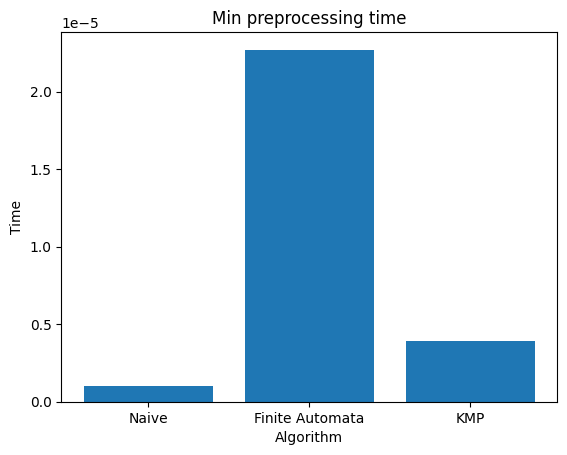

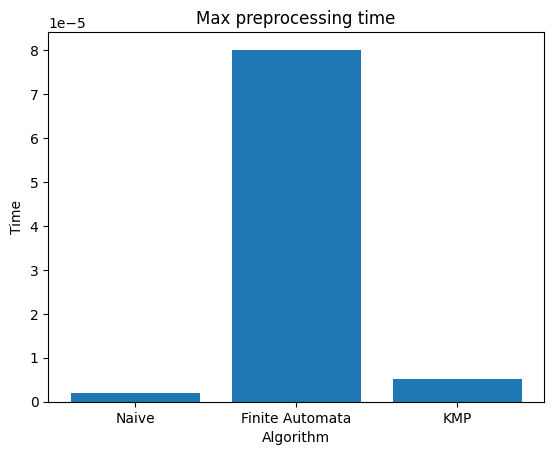

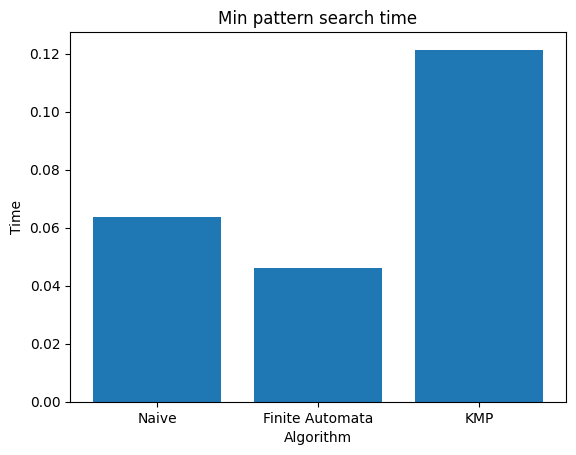

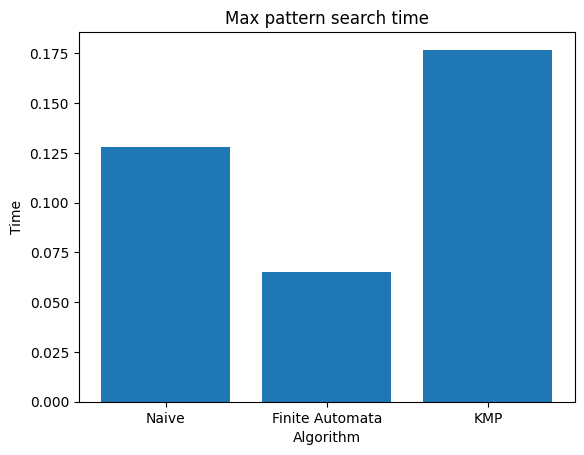

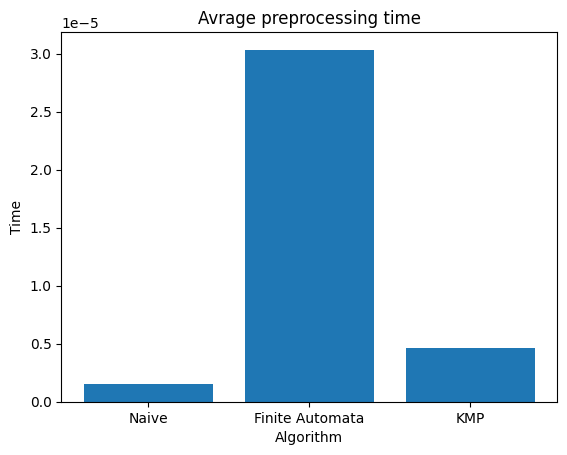

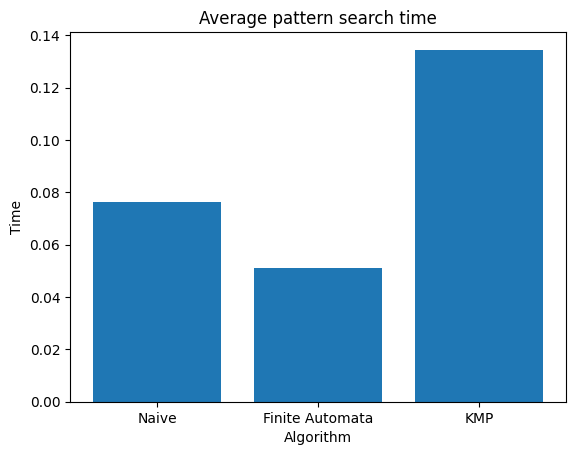

In [26]:
compare_performance(text,"pan")


## Zadanie 5

In [35]:

example_pattern = 'x' * 50000
example_text = example_pattern * 100


run_time_tests(example_text,example_pattern,False)

Time results for Naive Algorithm:
Preprocessing time: 1.0999999631167157e-06 s  Pattern search time: 19.441687900000034 s
 4950001 matches has been found

Time results for Finite Automata Algorithm:
Preprocessing time: 0.38368130000003475 s  Pattern search time: 1.8603714999999283 s
 4950001 matches has been found

Time results for KMP Algorithm:
Preprocessing time: 0.010332099999914135 s  Pattern search time: 1.719452899999851 s
 4950001 matches has been found



# Raport

Obserwując powyższe wyniki można stwierdzić, że algorytm naiwy wypadał zaskakująco dobrze w praktycznym zastosowaniu, często zwracając rezultat 
szybciej niż algorytmy typu Finite Automata oraz KMP. Osiągnięcie ponad pięciokrotnej różnicy czasowej wymagało zastosowania przypadku 
skrajnego - bardzo długiego klucza oraz dużej ilości pasujących wzorców. Dalsza analiza wyników czasowych testów przeprowadzonych na pliku tekstowym 
'pan-tadeusz.txt' pozwala stwierdzić, że algorytm Finite Automata miał najdłuższy czas preprocessingu. Najdłuższy czas wyszukiwania wzorca osiągał z kolei 
algorytm KMP. 
